new

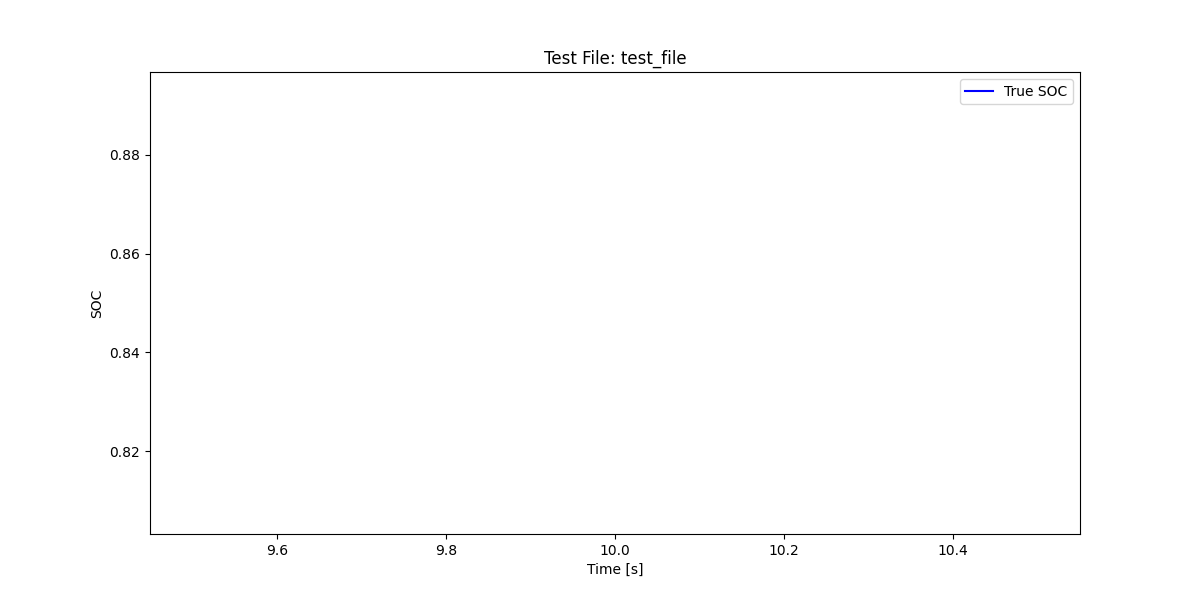

Test Results: {'test_file': {'labels': [0.85], 'predictions': [0.875], 'times': [10]}}


In [5]:
from flask import Flask, jsonify, request
from flask_cors import CORS
import json
import os
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend for matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image, display

app = Flask(__name__)
CORS(app)  # Enable CORS

# Function to generate mock test results
def test_model(test_loader):
    test_results = {}
    for data in test_loader:
        _, labels, filenames, times = data
        for filename, time, label in zip(filenames, times, labels):
            if filename not in test_results:
                test_results[filename] = {'times': [], 'labels': [], 'predictions': []}
            test_results[filename]['times'].append(time)
            test_results[filename]['labels'].append(label)
            test_results[filename]['predictions'].append(label + 0.025)  # Mock prediction
    return test_results

# Function to generate and save plots
def plot_soc_over_time(test_results):
    os.makedirs("plots", exist_ok=True)
    for filename, data in test_results.items():
        times = data['times']
        labels = data['labels']
        plt.figure(figsize=(12, 6))
        plt.plot(times, labels, label='True SOC', color='blue')
        plt.title(f'Test File: {filename}')
        plt.xlabel('Time [s]')
        plt.ylabel('SOC')
        plt.legend()
        filepath = f"plots/{filename}.png"
        plt.savefig(filepath)
        plt.close()
        # Display the image inline in Jupyter Notebook
        display(Image(filename=filepath))

@app.route('/test', methods=['POST'])
def process_test_input():
    # Get data from the request
    input_data = request.get_json()

    # Extract the input values
    label = input_data['label']
    filename = input_data['filename']
    time = input_data['time']

    # Simulate processing (this can be replaced by actual model logic)
    test_loader = [
        (None, [label], [filename], [time])
    ]
    test_results = test_model(test_loader)
    plot_soc_over_time(test_results)

    # Return the processed test result
    return jsonify(test_results)

# Instead of running a Flask server, call process_test_input directly for testing in Jupyter
# Sample input data for testing
input_data = {
    "label": 0.85,
    "filename": "test_file",
    "time": 10
}

# Simulate the Flask request handling in Jupyter
with app.test_request_context(json=input_data):
    response = process_test_input()
    print("Test Results:", response.get_json())
